In [1]:
%run setup.py

In [2]:
import scipy

In [3]:
# read in observational freqs
obs = pd.read_excel(rootpath+'solar_freq.xlsx')

# read in model S freqs
modS = pd.read_fwf(rootpath+'model_S.dat',skiprows=1,infer_nrows =3800)

l0 = modS['l']==0
fi = scipy.interpolate.interp1d(np.array(modS.loc[l0,'freq']), 
      np.array(modS.loc[l0,'E_norm']), kind='cubic', fill_value='extrapolate')

# merge
modS = pd.merge(obs, modS, on=['l', 'n'], suffixes=('_obs', '_mod'))
for imode, mode in modS.iterrows():
    modS.loc[imode, 'Q'] = mode['E_norm']/fi(mode['freq_mod'])
    
# surf corr
modS['freq_mod_cor'] = se.get_surface_correction(np.array(modS['freq_obs']), np.array(modS['l']), 
                                                  np.array(modS['freq_mod']), np.array(modS['l']), 
                                                  np.array(modS['E_norm']), 3100., formula='combined')


# read in our solar model
s = se.sums(rootpath+'hpc/solar_a09_ov/outputs/sample0060.sum').sums

cols = ['l','n_p','Refreq','E_norm']
data = np.array([s[col][irow] for col in cols for irow in range(s.shape[0])]).reshape(-1,s.shape[0]).T
mod = pd.DataFrame(data, columns=['l','n','freq','E_norm'])
idx = mod['l']==1
mod.loc[idx,'n'] += 1

l0 = mod['l']==0
fi = scipy.interpolate.interp1d(np.array(mod.loc[l0,'freq']), 
      np.array(mod.loc[l0,'E_norm']), kind='cubic', fill_value='extrapolate')

# merge
mod = pd.merge(obs, mod, on=['l', 'n'], suffixes=('_obs', '_mod'))
for imode, mode in mod.iterrows():
    mod.loc[imode, 'Q'] = mode['E_norm']/fi(mode['freq_mod'])

# surf corr
mod['freq_mod_cor'] = se.get_surface_correction(np.array(mod['freq_obs']), np.array(mod['l']), 
                                                  np.array(mod['freq_mod']), np.array(mod['l']), 
                                                  np.array(mod['E_norm']), 3100., formula='combined')

Processing : /import/silo5/yali4742/numax-sc-metallicity/hpc/solar_a09_ov/outputs/sample0060.sum


0

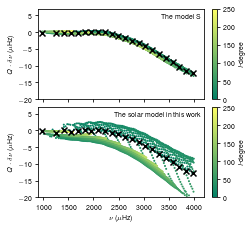

In [4]:
fig, axes = plt.subplots(figsize=mnras_size(ratio=0.9,column='one'),  \
                         nrows=2,ncols=1,squeeze=False,constrained_layout=True)
axes = axes.reshape(-1)

idx = modS['l']==0
axes[0].scatter(modS.loc[idx,'freq_obs'], (modS.loc[idx,'freq_obs']-modS.loc[idx,'freq_mod'])*mod.loc[idx,'Q'], marker='x',zorder=10,c='k')
c=axes[0].scatter(modS['freq_obs'], (modS['freq_obs']-modS['freq_mod'])*modS['Q'], c=modS['l'], cmap='summer', s=1)
plt.colorbar(c,ax=axes[0]).set_label('$l$-degree')



idx = mod['l']==0
axes[1].scatter(mod.loc[idx,'freq_obs'], (mod.loc[idx,'freq_obs']-mod.loc[idx,'freq_mod'])*mod.loc[idx,'Q'], marker='x',zorder=10,c='k')
c=axes[1].scatter(mod['freq_obs'], (mod['freq_obs']-mod['freq_mod'])*mod['Q'], c=mod['l'], cmap='summer', s=1)
plt.colorbar(c,ax=axes[1]).set_label('$l$-degree')


cases = ['The model S', 'The solar model in this work']
for iax in range(2):
    axes[iax].axis([900,4200,-20,7.])
    axes[iax].text(0.98, 0.9, cases[iax], transform=axes[iax].transAxes, ha='right')
    axes[iax].set_ylabel('$Q\\cdot\\delta\\nu$ ($\\mu$Hz)')
    
axes[1].set_xlabel('$\\nu$ ($\\mu$Hz)')
axes[0].set_xticklabels([])
fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.01, hspace=0, wspace=0)

filename = 'Fig.3_solar_models.pdf'

plt.savefig(filename)
os.system(to_overleaf(filename, 'figures'))

# Identify the solar model before and after applying the prescription

In [33]:
cat ../../hpc/results_cubic/000000000/summary_best.txt

best_model_by,chi2,chi2_nonseis,chi2_seis,index,star_age,star_mass,luminosity,radius,Teff,Yinit,Xinit,Zinit,log_g,amlt,FeH,delta_nu_scaling,numax_scaling,acoustic_cutoff,profile_number,Dnu_freq,surf_a3,surf_corr_at_numax,Dnu_freq_sc
chi2,0.9285279021152015,0.6278348772790195,0.30069302483618204,8039.0,7026853376.573156,0.91782,0.9981685921764976,0.9710345634462841,5854.775020265289,0.28385193,0.70355151,0.01259657,4.426355767056679,2.20777,-0.006032073236551305,135.26395278955337,2987.739283527815,2987.739283527815,83.0,135.75910188626798,-2.6732688175998708e-08,-3.7796395939065137,134.95705131901877
chi2_nonseis,296.59010520528176,0.03927466830658242,296.5508305369752,5623.0,3517708393.4575305,1.05259,1.0028519224972576,1.0036515757643618,5765.597196605275,0.22845642,0.75766575,0.01387783,4.457160925460305,2.05567,0.003853122420452104,137.85118784190067,3232.070403949794,3232.070403949794,46.0,138.02177036929766,-3.2373008432333057e-07,-35.285335079695535,129.7772178572057
chi2_seis,1

In [ ]:
8039.0, 0.91782, 83.0

In [42]:
cat ../../hpc/results_sc_cubic_linear_nueff/0/summary_best.txt

best_model_by,chi2,index,star_age,star_mass,luminosity,radius,Teff,Yinit,Xinit,Zinit,log_g,amlt,FeH,delta_nu_scaling,numax_scaling,profile_number
chi2,0.9285698494309012,8039.0,7026853376.573156,0.91782,0.9981685921764976,0.9710345634462841,5854.775020265289,0.28385193,0.70355151,0.01259657,4.426355767056679,2.20777,-0.006032073236551305,135.26395278955337,2987.739283527815,83.0
chi2_classical,0.03927466830658242,5623.0,3517708393.4575305,1.05259,1.0028519224972576,1.0036515757643618,5765.597196605275,0.22845642,0.75766575,0.01387783,4.457160925460305,2.05567,0.003853122420452104,137.85118784190067,3232.070403949794,46.0
chi2_seismic,0.10860180517965584,6023.0,4686756407.460272,0.99321,1.0789756379220332,0.9957448711376985,5895.293765581798,0.25130798,0.73743391,0.01125811,4.4388125545786865,2.178717,-0.07524758505228579,135.5045173349695,3064.0924514456296,58.0


In [ ]:
8039.0, 0.91782, 83.0